In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings as ws
ws.filterwarnings("ignore")

In [2]:
import pandas as pd
weather = pd.read_csv('/kaggle/input/weather-dataset-in-antwerp-belgium/weather_in_Antwerp.csv', ';')

In [3]:
def clear_wind(obj):
    if isinstance(obj, str):
        if obj == 'No wind':
            obj = 0
        else:
            obj = obj.replace(' km/h', '')
    return obj
def trans_from_objects(weather):
    weather.visibility = weather.visibility.apply(lambda x: x[0:-3] 
                                                  if isinstance(x, str) else x).astype(float)
    weather.barometer = weather.barometer.apply(lambda x: x.replace(' mbar', '') 
                                                if isinstance(x, str) else x).astype(float)
    weather.humidity = weather.humidity.apply(lambda x: x.replace('%', '') 
                                              if isinstance(x, str) else x).astype(float)
    weather.temp = weather.temp.apply(lambda x: x.replace('°C', '') 
                                      if isinstance(x, str) else x).astype(float)
    weather.wind = weather.wind.apply(clear_wind).astype(float)
    
    return weather

#transfer dataframe from objects dtype to numbers
weather.drop(['Unnamed: 0'], axis =1, inplace=True)
weather = trans_from_objects(weather)
weather.head()

,clock,temp,weather,wind,humidity,barometer,visibility,year,month,day
0,00:20,11.0,Mostly cloudy.,17.0,94.0,1011.0,5.0,2012,1,1
1,00:50,12.0,Mostly cloudy.,17.0,88.0,1011.0,NaN,2012,1,1
2,01:50,12.0,Overcast.,19.0,88.0,1011.0,9.0,2012,1,1
3,02:20,12.0,Partly cloudy.,17.0,88.0,1010.0,NaN,2012,1,1
4,02:50,12.0,Sprinkles. Mostly cloudy.,15.0,88.0,1010.0,NaN,2012,1,1


In [4]:
df = weather

In [5]:
df.head()

,clock,temp,weather,wind,humidity,barometer,visibility,year,month,day
0,00:20,11.0,Mostly cloudy.,17.0,94.0,1011.0,5.0,2012,1,1
1,00:50,12.0,Mostly cloudy.,17.0,88.0,1011.0,NaN,2012,1,1
2,01:50,12.0,Overcast.,19.0,88.0,1011.0,9.0,2012,1,1
3,02:20,12.0,Partly cloudy.,17.0,88.0,1010.0,NaN,2012,1,1
4,02:50,12.0,Sprinkles. Mostly cloudy.,15.0,88.0,1010.0,NaN,2012,1,1


In [6]:
df.dtypes

clock          object
temp          float64
weather        object
wind          float64
humidity      float64
barometer     float64
visibility    float64
year            int64
month           int64
day             int64
dtype: object

In [7]:
df.clock = df.clock.str.replace(":", ".").astype(float)

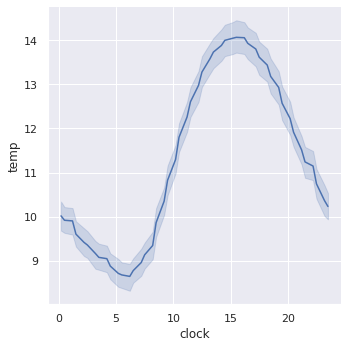

In [8]:
sns.set()
sns.relplot(x ="clock", y ="temp", data = df, kind = "line")
plt.show()

*Plot shows the variation of the temprature over the  course of the time *

In [9]:
weather_top_five_condition =df.weather.value_counts().reset_index().sort_values(by ="weather" ,ascending = False)[0:5]

In [10]:
condition = weather_top_five_condition["index"]

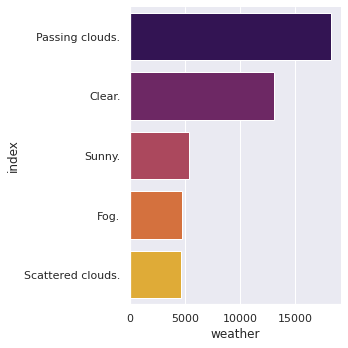

In [11]:
sns.set()
sns.catplot(y="index", x ="weather", data = weather_top_five_condition, kind = "bar", palette="inferno")
plt.show()

In [12]:
df.isna().sum()

clock             0
temp             19
weather           3
wind             42
humidity         21
barometer        11
visibility    32985
year              0
month             0
day               0
dtype: int64

In [13]:
df.drop("visibility", axis = 1, inplace = True)

In [14]:
df.head()

,clock,temp,weather,wind,humidity,barometer,year,month,day
0,0.2,11.0,Mostly cloudy.,17.0,94.0,1011.0,2012,1,1
1,0.5,12.0,Mostly cloudy.,17.0,88.0,1011.0,2012,1,1
2,1.5,12.0,Overcast.,19.0,88.0,1011.0,2012,1,1
3,2.2,12.0,Partly cloudy.,17.0,88.0,1010.0,2012,1,1
4,2.5,12.0,Sprinkles. Mostly cloudy.,15.0,88.0,1010.0,2012,1,1


In [15]:
# filling na values in the numerical variable
df[["temp", "wind", "humidity", "barometer"]] = df[["temp", "wind", "humidity", "barometer"]].fillna(df.median())

In [16]:
df["weather"] = df["weather"].fillna("Partly cloudy")

In [17]:
df.isna().sum()

clock        0
temp         0
weather      0
wind         0
humidity     0
barometer    0
year         0
month        0
day          0
dtype: int64

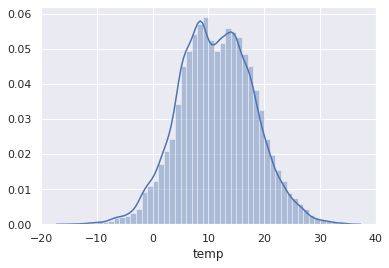

In [18]:
num_col = ["temp", "wind", "humidity", "barometer"]

sns.set()
sns.distplot(df["temp"])
plt.show()

Not quite but it is normally distribured

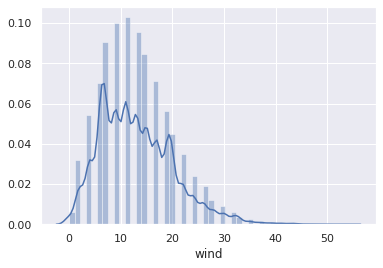

0.796041232196916


In [19]:
sns.set()
sns.distplot(df["wind"])
plt.show()
print(df["wind"].skew())

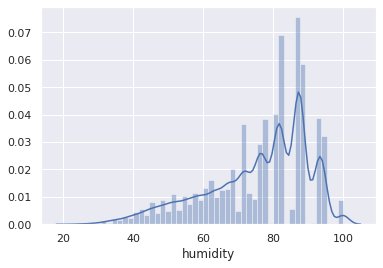

-0.8149167014110806


In [20]:
sns.set()
sns.distplot(df["humidity"])
plt.show()
print(df["humidity"].skew())


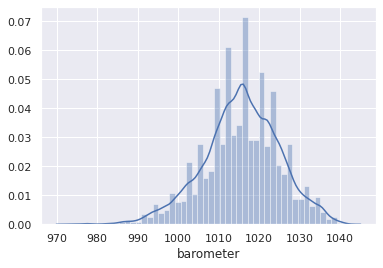

-0.28875043024954816


In [21]:
sns.set()
sns.distplot(df["barometer"])
plt.show()
print(df["barometer"].skew())

In [22]:
condition

0      Passing clouds.
1               Clear.
2               Sunny.
3                 Fog.
4    Scattered clouds.
Name: index, dtype: object

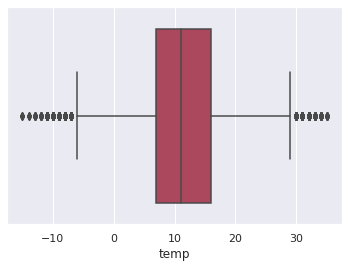

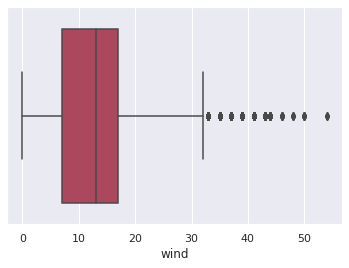

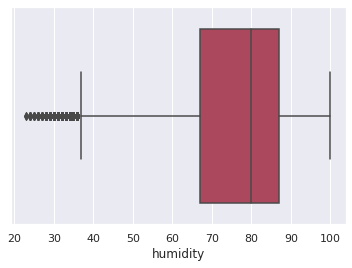

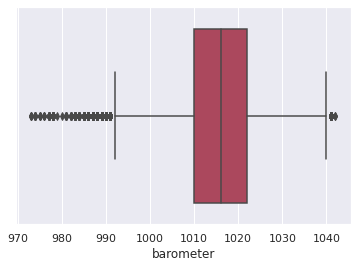

In [23]:
for i in num_col:
    sns.set()
    sns.boxplot(df[i], palette="inferno")
    plt.show() 

*I am Taking the  paleete color as INFERNO Because i like Playing Couter Strike Global Offensive*



***UpVote it if you find it useful***